We import the necessary functions needed for the analysis here

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

This represents where we locate our specific data file needed for the analysis. Data was downloaded from Kaggle

In [2]:
STD_df =pd.read_csv("../STD/STD Cases.csv")

This is used to find any values considered to be unusuable for the information needed at the end of the data frame.

In [11]:
STD_df.isna

<bound method DataFrame.isna of        index    Disease  Disease Code    State    Year Gender          Age  \
0          0  Chlamydia         274.0  Alabama  1996.0   Male   0-14 years   
1          1  Chlamydia         274.0  Alabama  1996.0   Male  15-19 years   
2          2  Chlamydia         274.0  Alabama  1996.0   Male  20-24 years   
3          3  Chlamydia         274.0  Alabama  1996.0   Male  25-29 years   
4          4  Chlamydia         274.0  Alabama  1996.0   Male  30-34 years   
...      ...        ...           ...      ...     ...    ...          ...   
42675  42675        NaN           NaN      NaN     NaN    NaN          NaN   
42676  42676        NaN           NaN      NaN     NaN    NaN          NaN   
42677  42677        NaN           NaN      NaN     NaN    NaN          NaN   
42678  42678        NaN           NaN      NaN     NaN    NaN          NaN   
42679  42679        NaN           NaN      NaN     NaN    NaN          NaN   

      Age Code  STD Cases  Popu

In [13]:
STD_df.describe()

,index,Disease Code,Year,STD Cases,Population,Rate per 100K
count,42680.000000,42530.000000,42530.000000,42530.000000,3.548300e+04,35483.000000
mean,21339.500000,283.795533,2005.240607,603.133647,4.389794e+05,325.661860
std,12320.799081,13.723063,5.431696,1973.091099,7.605588e+05,697.545461
min,0.000000,274.000000,1996.000000,1.000000,1.293700e+04,0.020000
25%,10669.750000,274.000000,2001.000000,8.000000,9.418100e+04,6.950000
50%,21339.500000,280.000000,2005.000000,59.000000,1.966280e+05,52.890000
75%,32009.250000,280.000000,2010.000000,380.000000,4.322250e+05,302.955000
max,42679.000000,310.000000,2014.000000,46885.000000,8.880836e+06,9078.950000


In [15]:
# This drops the na values at the end of the df
STD_df.dropna(inplace = True)
print(STD_df.isnull().sum())
print(STD_df.info)

index            0
Disease          0
Disease Code     0
State            0
Year             0
Gender           0
Age              0
Age Code         0
STD Cases        0
Population       0
Rate per 100K    0
dtype: int64
<bound method DataFrame.info of        index                         Disease  Disease Code    State    Year  \
0          0                       Chlamydia         274.0  Alabama  1996.0   
1          1                       Chlamydia         274.0  Alabama  1996.0   
2          2                       Chlamydia         274.0  Alabama  1996.0   
3          3                       Chlamydia         274.0  Alabama  1996.0   
4          4                       Chlamydia         274.0  Alabama  1996.0   
...      ...                             ...           ...      ...     ...   
42625  42625  Primary and Secondary Syphilis         310.0  Wyoming  2004.0   
42626  42626  Primary and Secondary Syphilis         310.0  Wyoming  2007.0   
42627  42627  Primary and Secondary

In [16]:
STD_df.head(10)

,index,Disease,Disease Code,State,Year,Gender,Age,Age Code,STD Cases,Population,Rate per 100K
0,0,Chlamydia,274.0,Alabama,1996.0,Male,0-14 years,0-14,25.0,468394.0,5.34
1,1,Chlamydia,274.0,Alabama,1996.0,Male,15-19 years,15-19,164.0,165920.0,98.84
2,2,Chlamydia,274.0,Alabama,1996.0,Male,20-24 years,20-24,193.0,152848.0,126.27
3,3,Chlamydia,274.0,Alabama,1996.0,Male,25-29 years,25-29,88.0,152778.0,57.60
4,4,Chlamydia,274.0,Alabama,1996.0,Male,30-34 years,30-34,55.0,155850.0,35.29
5,5,Chlamydia,274.0,Alabama,1996.0,Male,35-39 years,35-39,30.0,168841.0,17.77
6,6,Chlamydia,274.0,Alabama,1996.0,Male,40+ years,40+,44.0,819248.0,5.37
8,8,Chlamydia,274.0,Alabama,1997.0,Male,0-14 years,0-14,27.0,473016.0,5.71
9,9,Chlamydia,274.0,Alabama,1997.0,Male,15-19 years,15-19,230.0,167083.0,137.66
10,10,Chlamydia,274.0,Alabama,1997.0,Male,20-24 years,20-24,185.0,150783.0,122.69


In [17]:
STD_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35483 entries, 0 to 42629
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          35483 non-null  int64  
 1   Disease        35483 non-null  object 
 2   Disease Code   35483 non-null  float64
 3   State          35483 non-null  object 
 4   Year           35483 non-null  float64
 5   Gender         35483 non-null  object 
 6   Age            35483 non-null  object 
 7   Age Code       35483 non-null  object 
 8   STD Cases      35483 non-null  float64
 9   Population     35483 non-null  float64
 10  Rate per 100K  35483 non-null  float64
dtypes: float64(5), int64(1), object(5)
memory usage: 3.2+ MB


Since we are looking at the data based on the gender. We define male and female based on the dataset and their location. Male is founded in the first 18000 cells, where as the females were founded to be in the remaining cells

In [19]:
Male = STD_df['Gender'][0:18131, ]
print(Male)
Female = STD_df['Gender'][18132:, ]
print(Female)

0        Male
1        Male
2        Male
3        Male
4        Male
         ... 
19456    Male
19457    Male
19458    Male
19459    Male
19460    Male
Name: Gender, Length: 18131, dtype: object
23930    Female
23931    Female
23932    Female
23933    Female
23934    Female
          ...  
42625    Female
42626    Female
42627    Female
42628    Female
42629    Female
Name: Gender, Length: 17351, dtype: object


The code below represents finding the highest std related cases by years for the male population. 

Text(0.5, 1.0, 'Highest STD Cases by Males per Year')

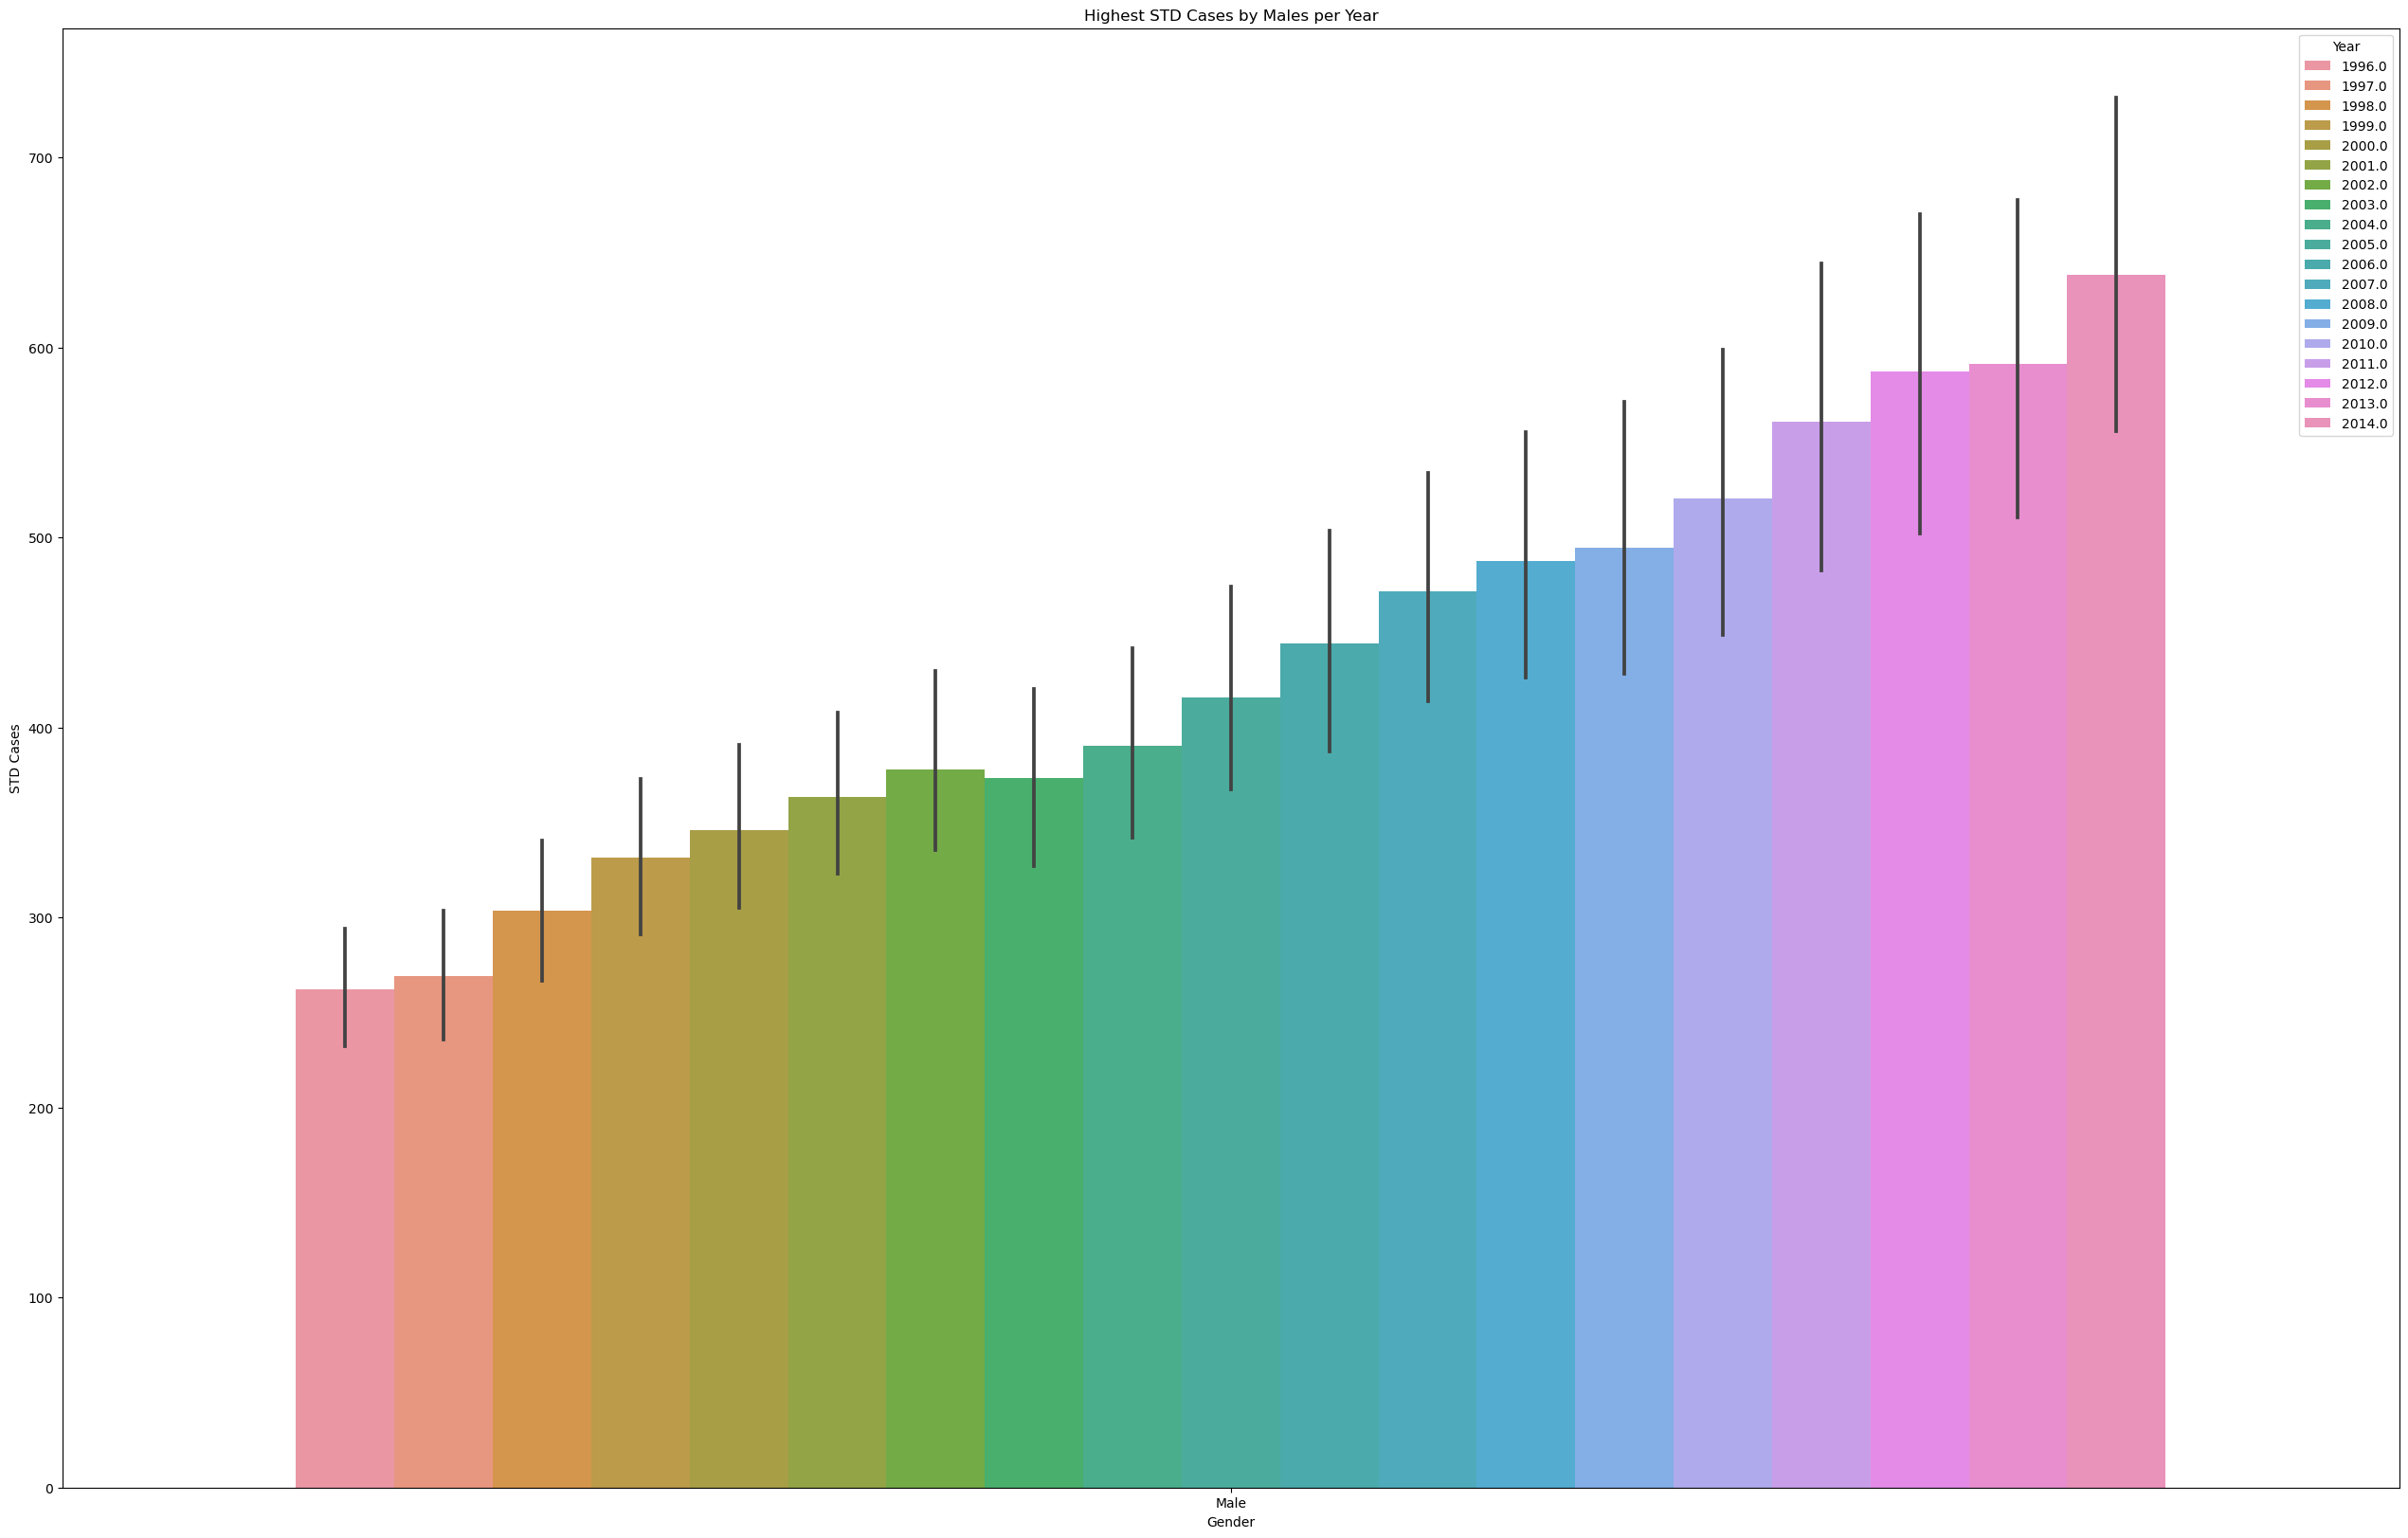

In [34]:
plt.figure(figsize = (70, 20), facecolor = "white")
plt.subplot(1, 2, 1)
sns.barplot(x = Male, y = STD_df['STD Cases'], hue = STD_df['Year'])
plt.title("Highest STD Cases by Males per Year")

The code below represents finding the highest std related cases by years for the female population. 

Text(0.5, 1.0, 'Highest STD Cases by Females per Year')

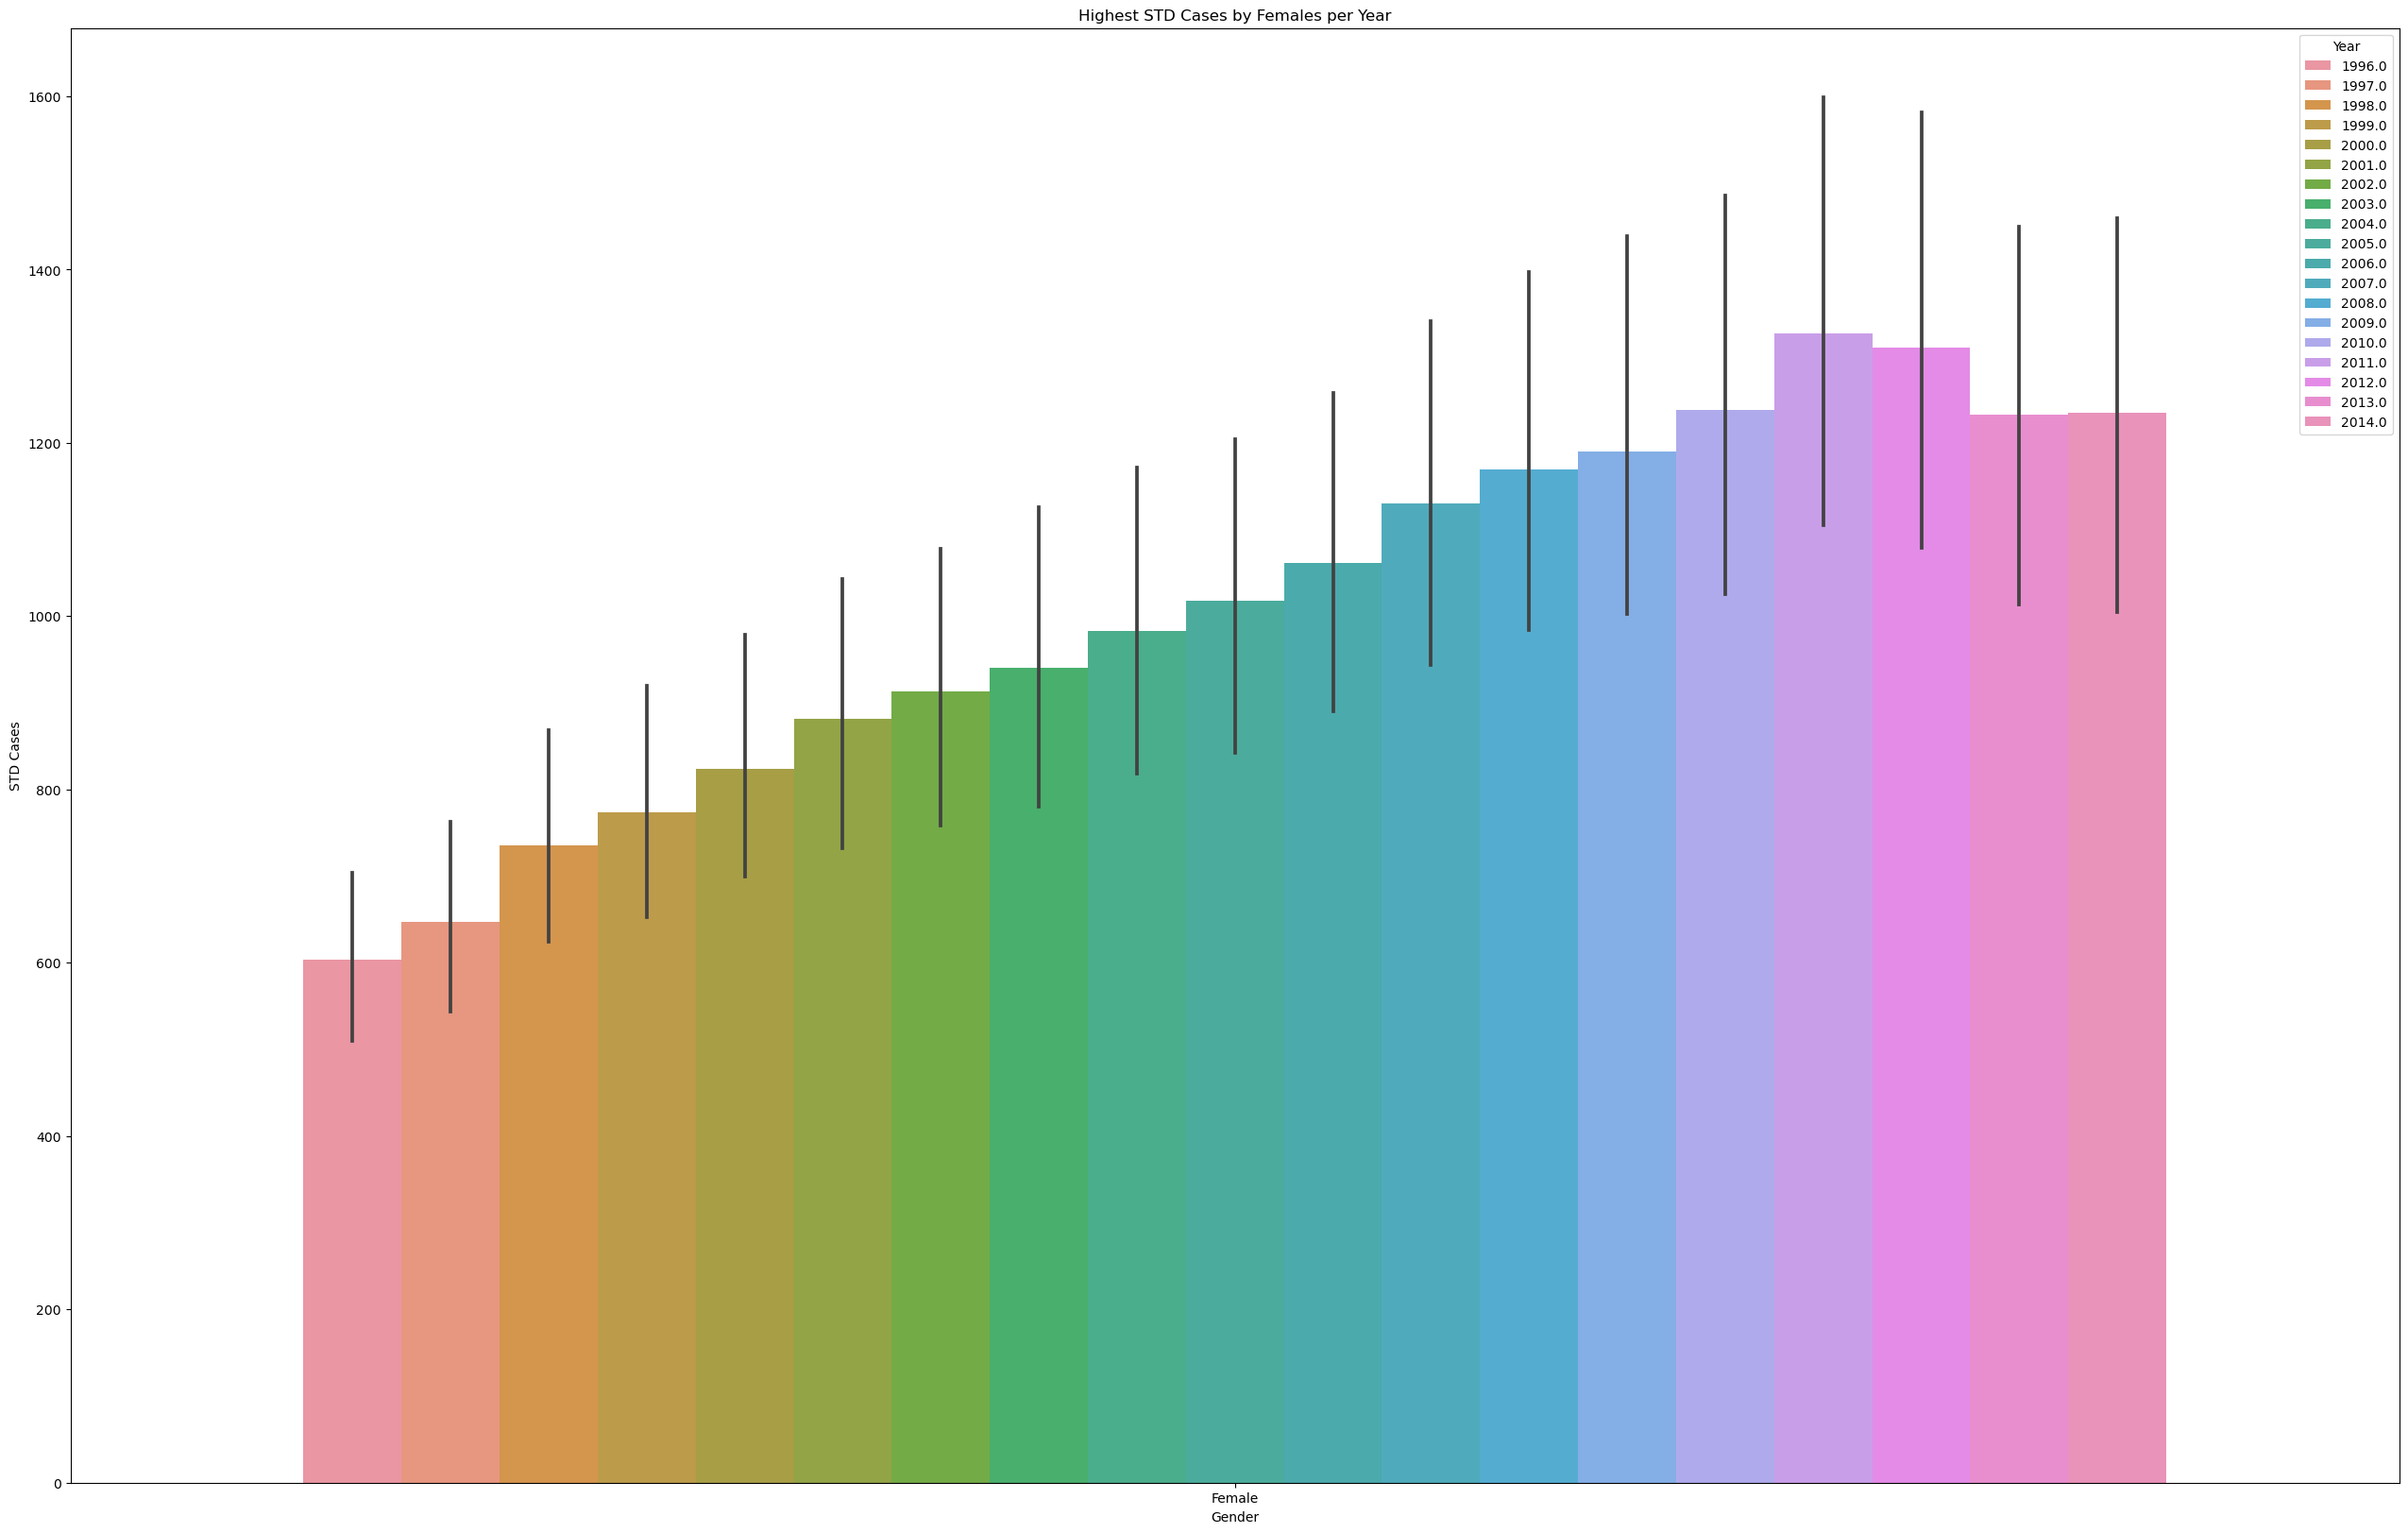

In [21]:
plt.figure(figsize = (70, 20), facecolor = "white")
plt.subplot(1, 2, 1)
sns.barplot(x = Female, y = STD_df['STD Cases'], hue = STD_df['Year'])
plt.title("Highest STD Cases by Females per Year")

In [22]:
#Code represents finding unique cases of STD in the dataframe.
print(STD_df['Disease'].unique())

['Chlamydia' 'Gonorrhea' 'Primary and Secondary Syphilis']


Text(0.5, 1.0, 'Male STD Cases by Disease')

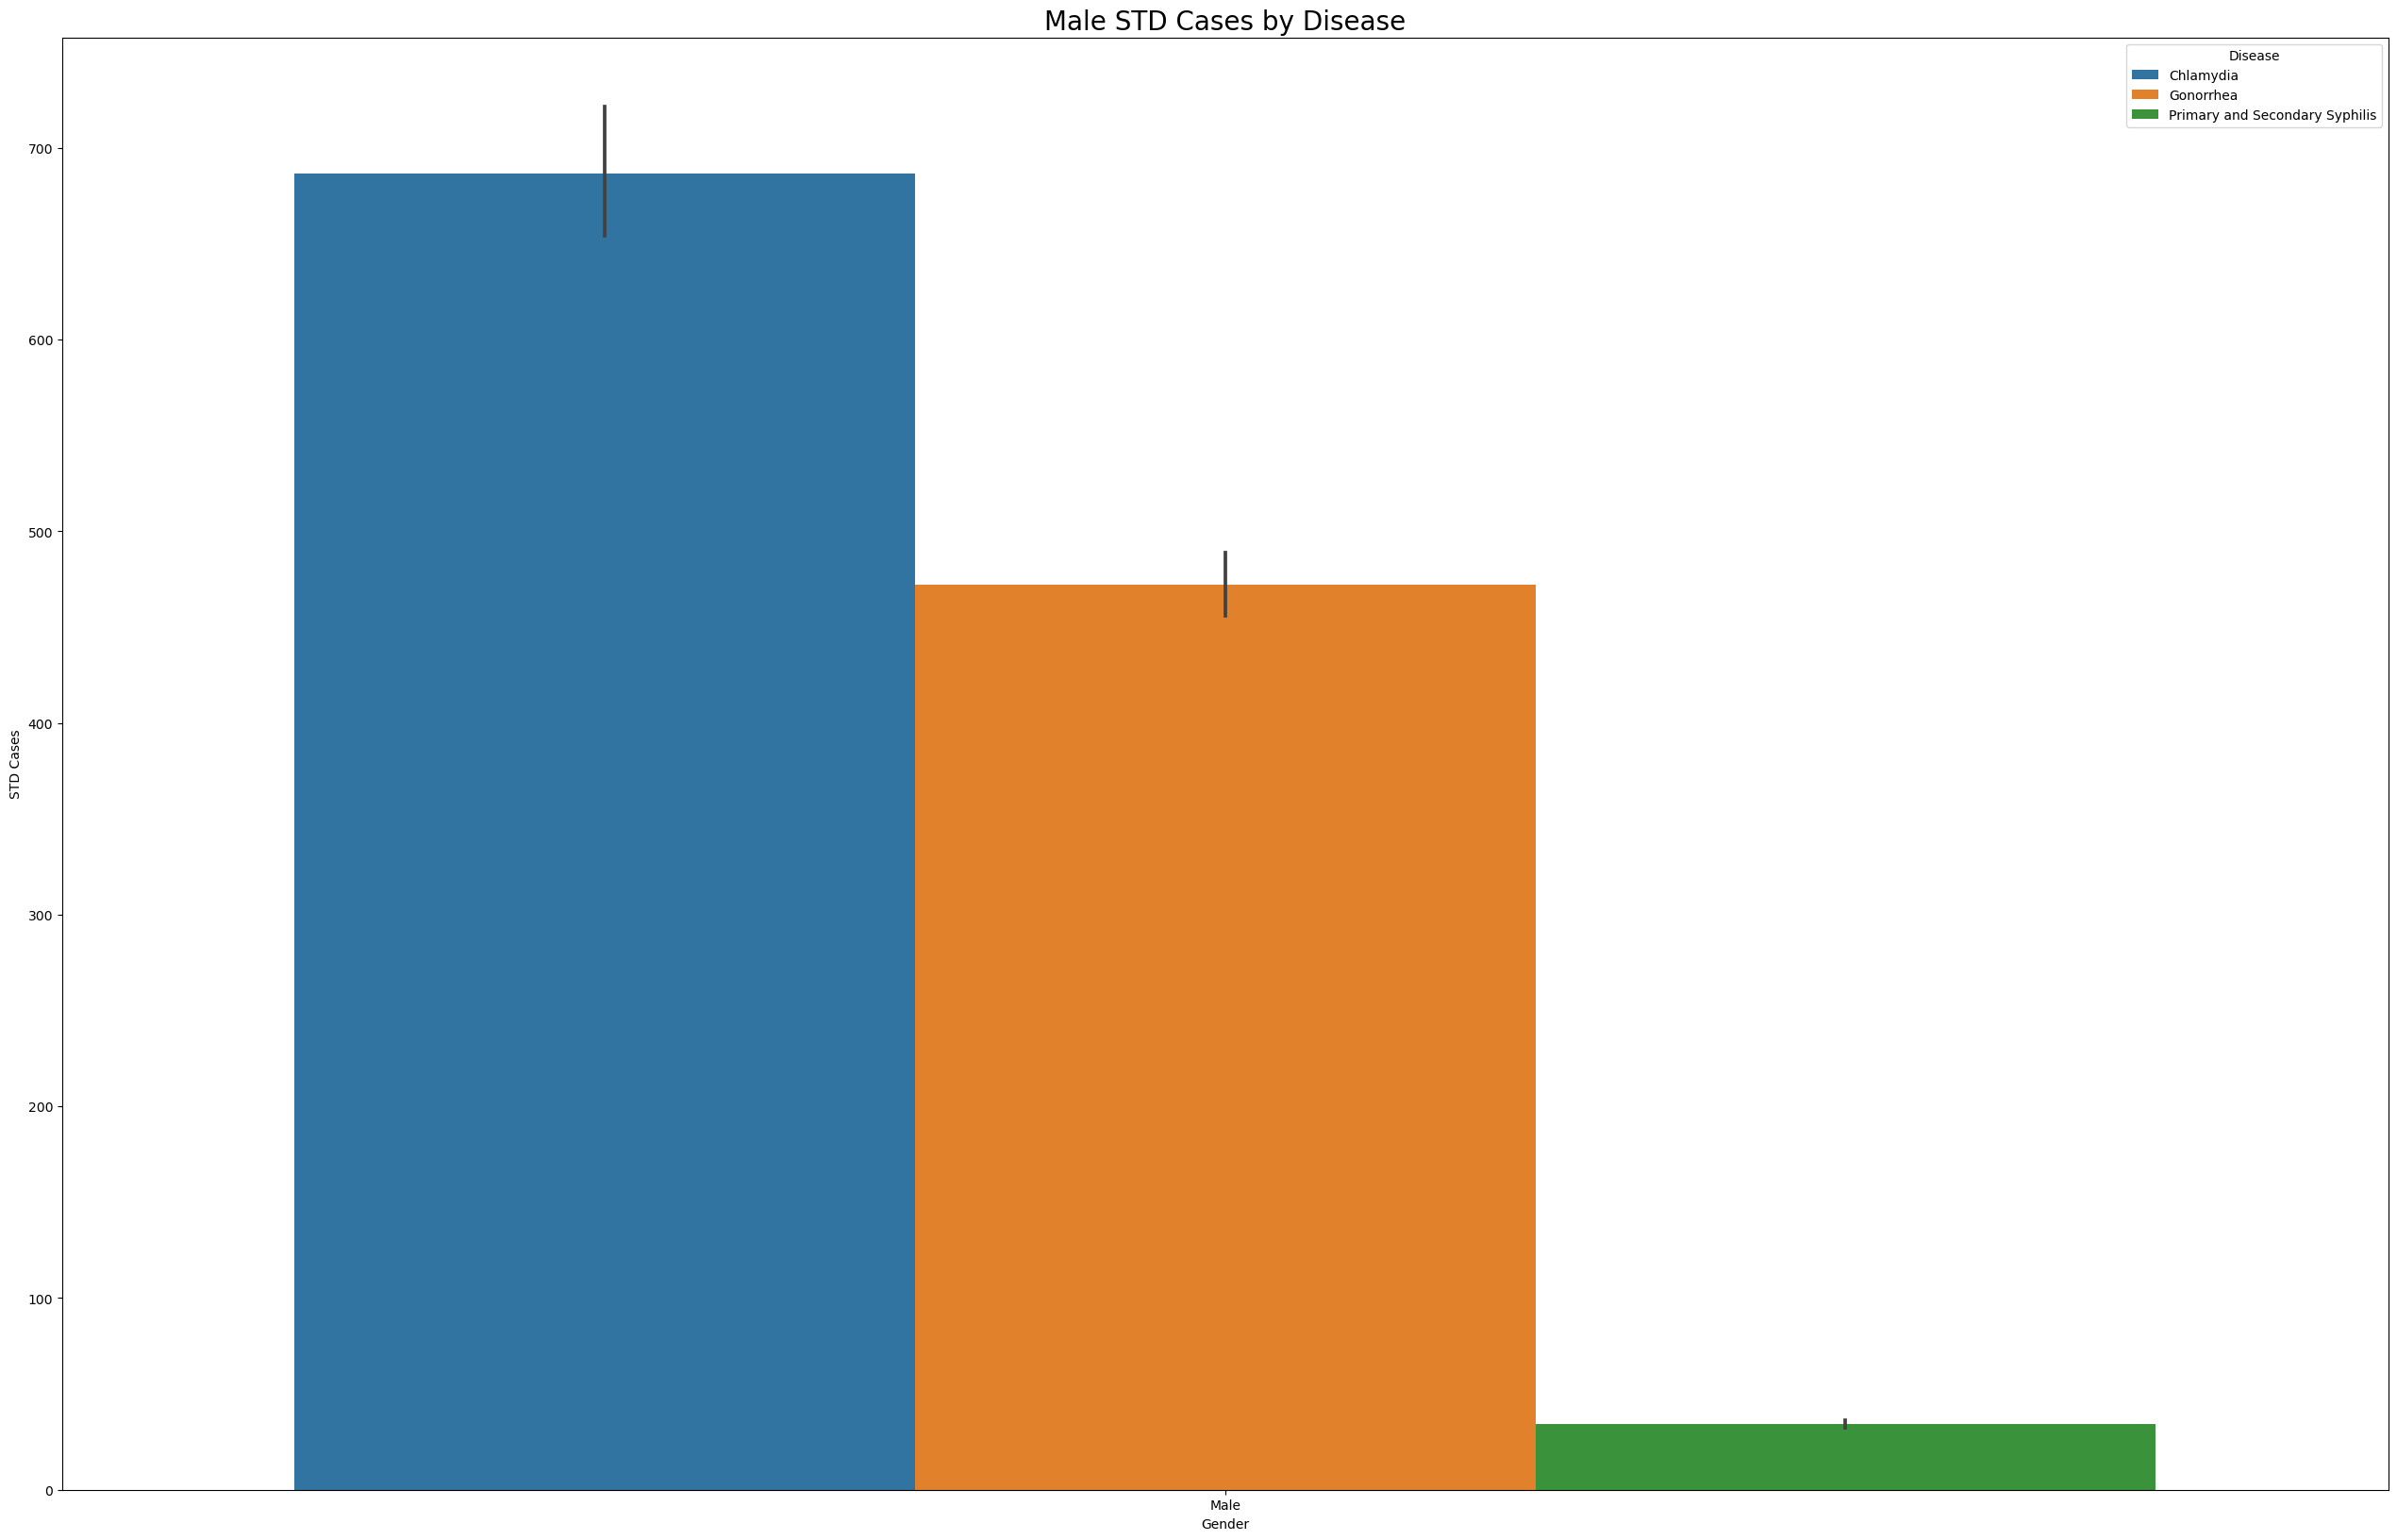

In [31]:
plt.figure(figsize = (70, 20), facecolor = "white")
plt.subplot(1, 2, 1)
sns.barplot(y = STD_df['STD Cases'], x = Male, hue = STD_df['Disease'])
fontsize = 20
fontsup = 20
plt.title("Male STD Cases by Disease", fontdict = {'fontsize': fontsize})

Text(0.5, 1.0, 'Female STD Cases by Disease')

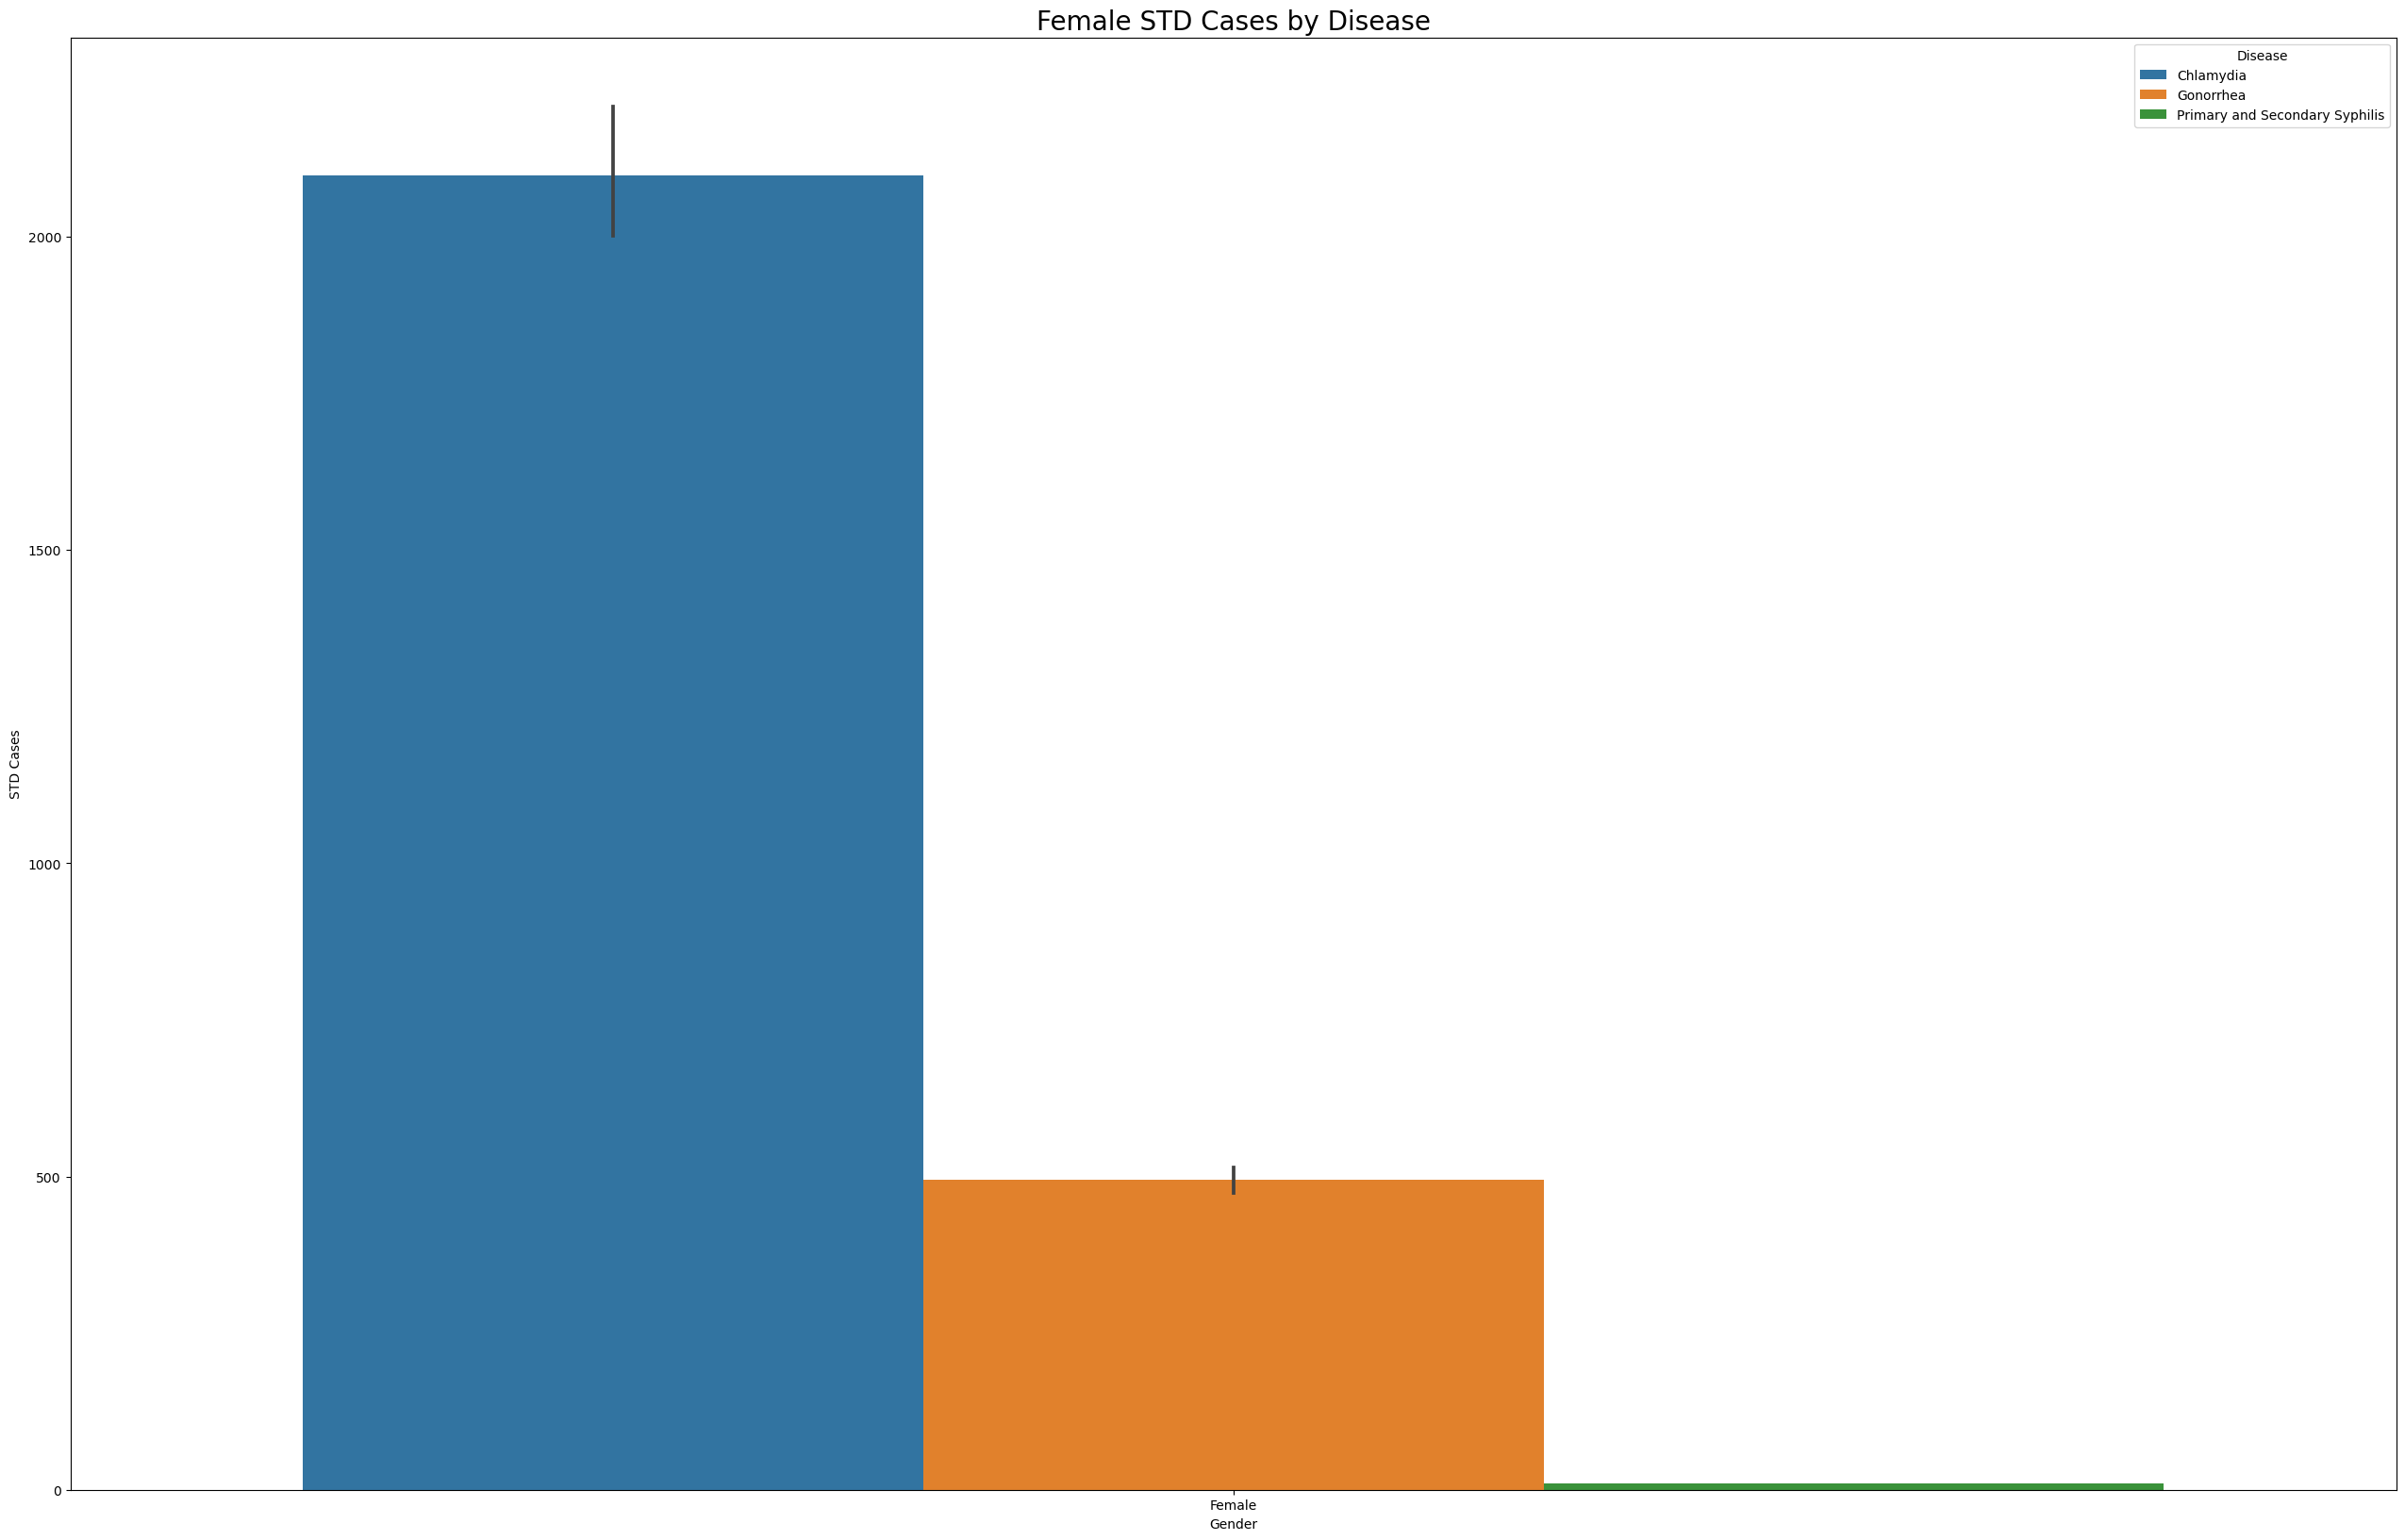

In [32]:
plt.figure(figsize = (70, 20), facecolor = "white")
plt.subplot(1, 2, 1)
sns.barplot(y = STD_df['STD Cases'], x = Female, hue = STD_df['Disease'])
fontsize = 20
fontsup = 20
plt.title("Female STD Cases by Disease", fontdict = {'fontsize': fontsize})